In [1165]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

from brian2 import *

from my_code.aux_functions import *
from my_code.parameters import *
from my_code.network import *
from my_code.tests import *
from my_code.MyPlots import *
import my_code.MyPlots as Mplt

In [1166]:
# THE CURRENT THRESHOLD
print('current threshold:',(-60*mV+50*mV)*10*nS)
# POTENTIAL THRESHOLD
print('potential threshold:',100*pA/(10*nS)-60*mV)

current threshold: -100. pA
potential threshold: -50. mV


# Set Parameters

In [1181]:
stimulation = 'none'
net_params = get_default_net_params()
test_params = get_dft_test_params()

net_params['g_leak_p'].set_param(10)
net_params['tau_l'].set_param(1)
net_params['mem_cap_p'].set_param(200)

net_params['prob_pp'].set_param(0.1)

net_params['g_pp'].set_param(0)
net_params['g_bp'].set_param(0)
net_params['g_pb'].set_param(0)
net_params['g_bb'].set_param(0)

net_params['tau_d_p'].set_param(2)
net_params['tau_d_b'].set_param(1.5)

net_params['J_spi_p'].set_param(5)
net_params['tau_adapt_p'].set_param(250)

net_params['J_spi_b'].set_param(0)
net_params['tau_adapt_b'].set_param(250)

equal_noise = False
net_params['curr_bg_equal_to_pop'].set_param(equal_noise)
net_params['curr_bg_equal_to_neurons'].set_param(equal_noise)
net_params['curr_bg_base_p'].set_param(101)
net_params['curr_bg_base_b'].set_param(101)
net_params['curr_bg_noise_amp_p'].set_param(20)
net_params['curr_bg_noise_amp_b'].set_param(20)
net_params['curr_bg_noise_dt'].set_param(.1)
# net_params['curr_bg_p'].set_param(101)
# net_params['curr_bg_b'].set_param(101)

test_params['sim_dt'].set_param(.1)

# net_params['v_stop_p'].set_param(-51+2*rand(8200))
# net_params['v_stop_b'].set_param(-51+4*rand(135))
# net_params['tau_l'].set_param(0)

sim_time = 4
test_params['sim_time'].set_param(sim_time)
test_params['stim_strength'].set_param(0)
test_params['min_peak_height'].set_param(20)
# test_params['mean_peak_distant'].set_param(0)

# Set Model and Monitors

In [1182]:
currents_to_record = {'curr_p': True, 'curr_b': True, 'curr_bg': True, 'curr_l': True, 'curr_net': True}
built_network, used_net_params = build_network(net_params,initial_condition='none')
built_network, test_params = record_network(built_network, used_net_params, test_params)
built_network, test_params = record_p_currents(built_network, used_net_params, test_params,currents_to_record)
built_network, test_params = record_b_currents(built_network, used_net_params, test_params, currents_to_record)

BP Model with Adaptation
Neuron type: adaptive leaky integrate-and-fire
Total number of synapses
P->P: 6,718,333
B->P: 553,659
P->B: 221,323
B->B: 3,695


In [1183]:
# set the initial value for membrane potential
initial_v_noise = 10
# initial_v_noise = 0
built_network['pop_p'].v = built_network['pop_p'].e_rever-initial_v_noise*rand(8200)*mV
built_network['pop_b'].v = built_network['pop_b'].e_rever-initial_v_noise*rand(135)*mV

# set the initial value for adatation current
initial_adapt_noise = 100
# initial_adapt_noise = 0
built_network['pop_p'].curr_adapt = initial_adapt_noise*rand(8200)*pA
built_network['pop_b'].curr_adapt = initial_adapt_noise*rand(135)*pA

# Run the model and get Monitos

In [1184]:
tested_network, test_params = run_test(built_network, test_params, used_net_params, stimulation = stimulation)
ready_monitors, test_data, test_params = prepare_test(tested_network, test_params, used_net_params)
ready_monitors = average_p_currents(tested_network, ready_monitors, currents_to_record)
ready_monitors = average_b_currents(tested_network, ready_monitors, currents_to_record)

default clock dt: 100. us


Starting simulation at t=0. s for a duration of 2. s
1.8553 s (92%) simulated in 10s, estimated 1s remaining.
2. s (100%) simulated in 10s
Starting simulation at t=2. s for a duration of 4. s
1.8463 s (46%) simulated in 10s, estimated 12s remaining.
3.694 s (92%) simulated in 20s, estimated 2s remaining.
4. s (100%) simulated in 21s


# Graph parameters

In [1185]:
currents_to_plot = {'curr_adp': True,'curr_p': True, 'curr_b': True, 'curr_bg': True, 'curr_l': True, 'curr_net': True}
# currents_to_plot['curr_adp'] = False 
# currents_to_plot['curr_p'] = False
# currents_to_plot['curr_b'] = False
currents_to_plot['curr_bg'] = False
currents_to_plot['curr_l'] = False
currents_to_plot['curr_net'] = False

curr_y_limit = None
# curr_y_limit = [-150,150]

start, end = 0, (sim_time+2)
y_axis_limit= None
# y_axis_limit= [0,50]
x_axis_limit = [start, end]
# x_axis_limit = [0.8,1]

## Currents

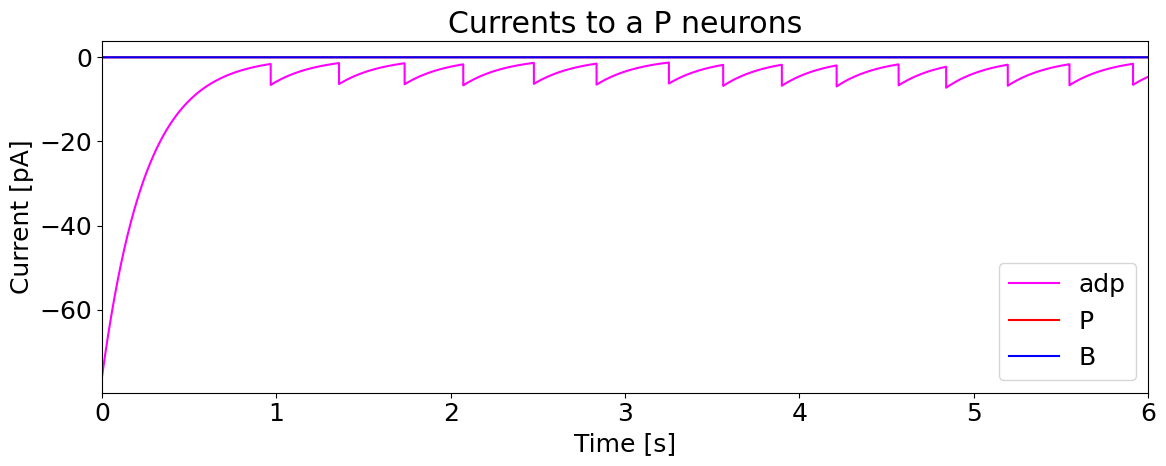

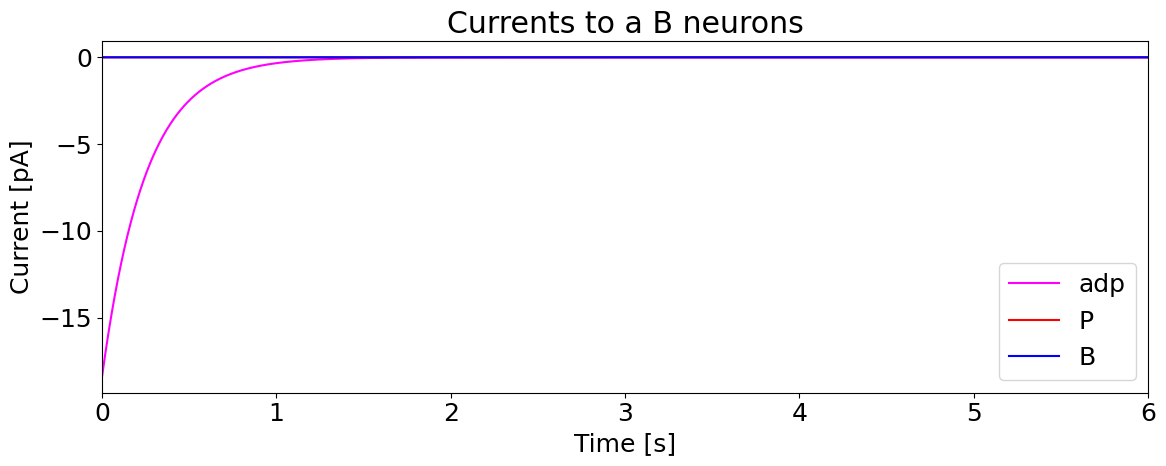

In [1186]:
reload(Mplt)
Mplt.plot_currents_P_neurons(built_network,currents_to_plot, x_axis_limit,curr_y_limit)
Mplt.plot_currents_B_neurons(built_network,currents_to_plot, x_axis_limit,curr_y_limit)

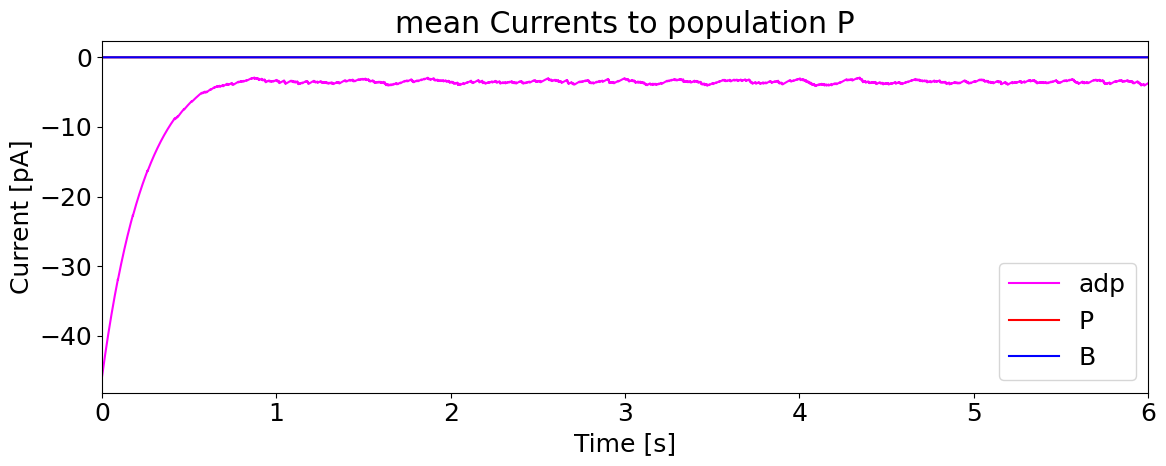

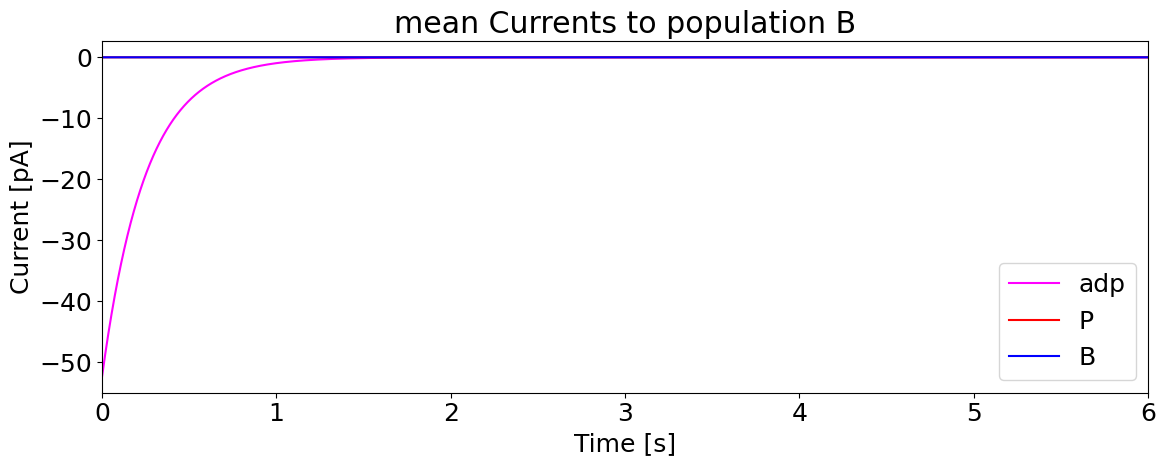

In [1187]:
reload(Mplt)
Mplt.plot_current_P_pop(ready_monitors, currents_to_plot, x_axis_limit,curr_y_limit)
Mplt.plot_current_B_pop(ready_monitors, currents_to_plot, x_axis_limit,curr_y_limit)

## Firing rates

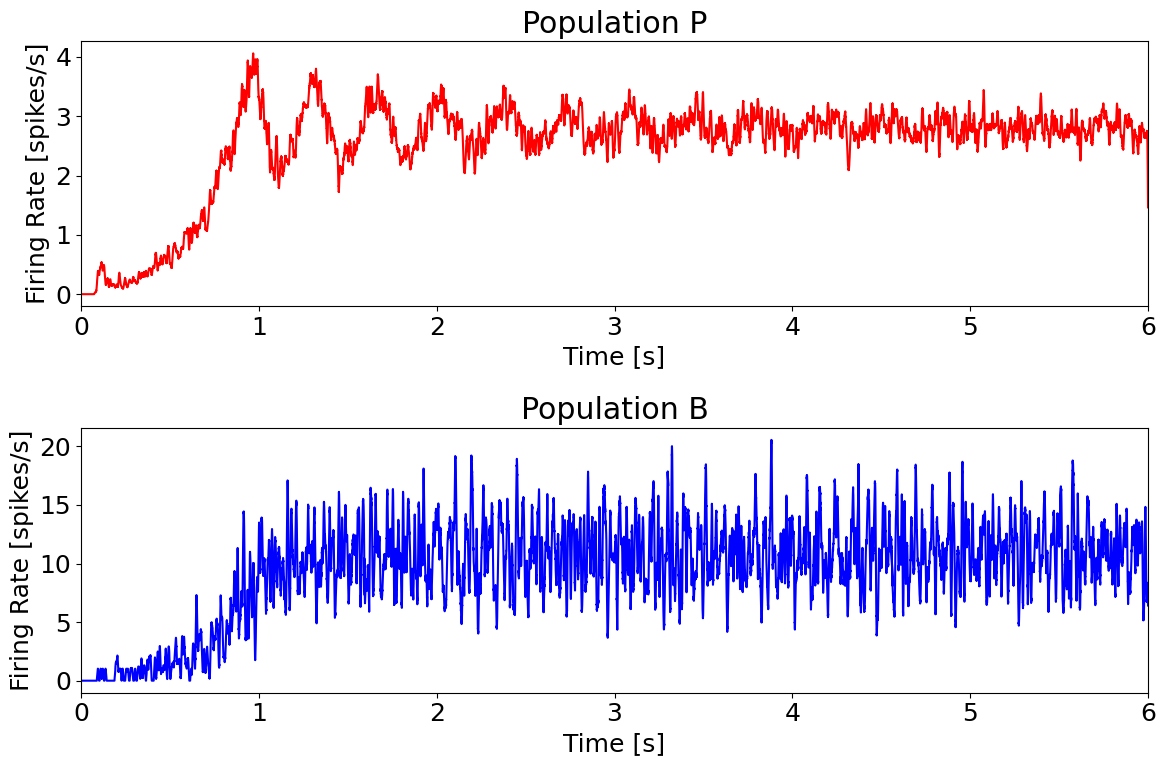

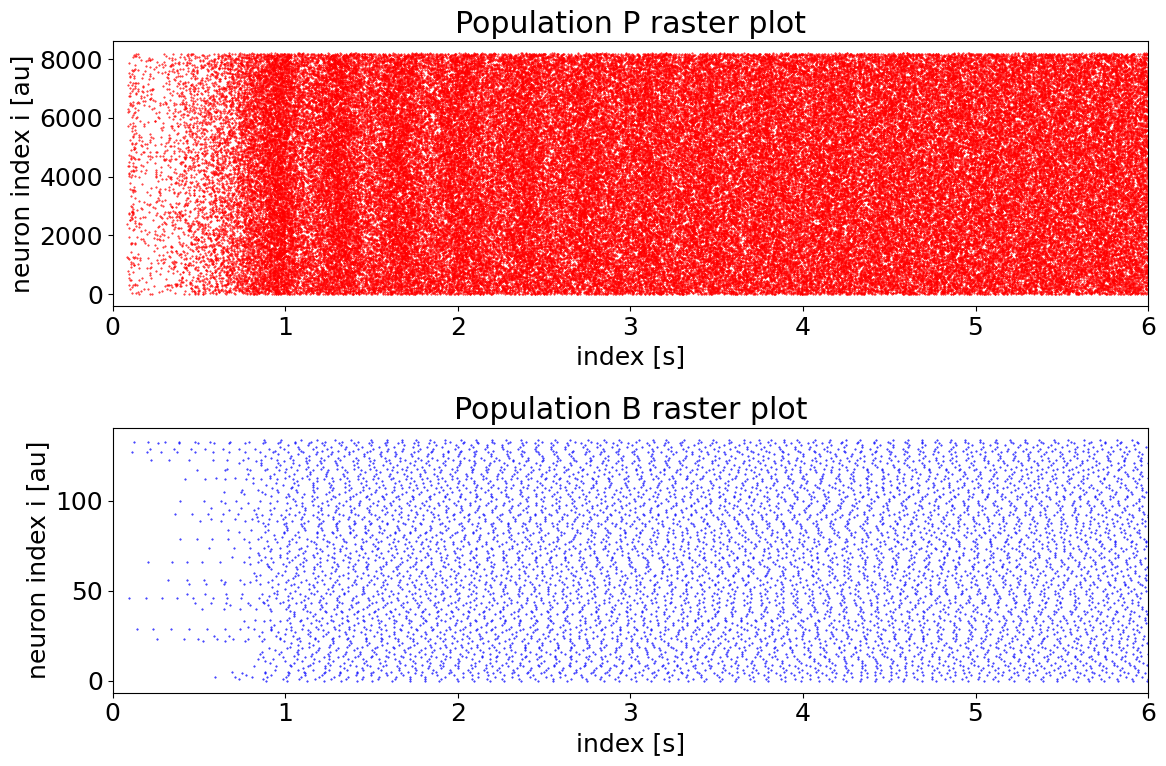

In [1188]:
reload(Mplt)
Mplt.plot_population_fr(ready_monitors,x_axis_limit)
Mplt.plot_rasterplot(tested_network,x_axis_limit,y_axis_limit=None)

In [1189]:
print('P firing overall:',"%.2f" % np.mean(test_data['mean_rate_p']),'spikes/s')
print('B firing overall:',"%.2f" % np.mean(test_data['mean_rate_b']),'spikes/s')

P firing overall: 2.81 spikes/s
B firing overall: 10.97 spikes/s


## Membrane Potential

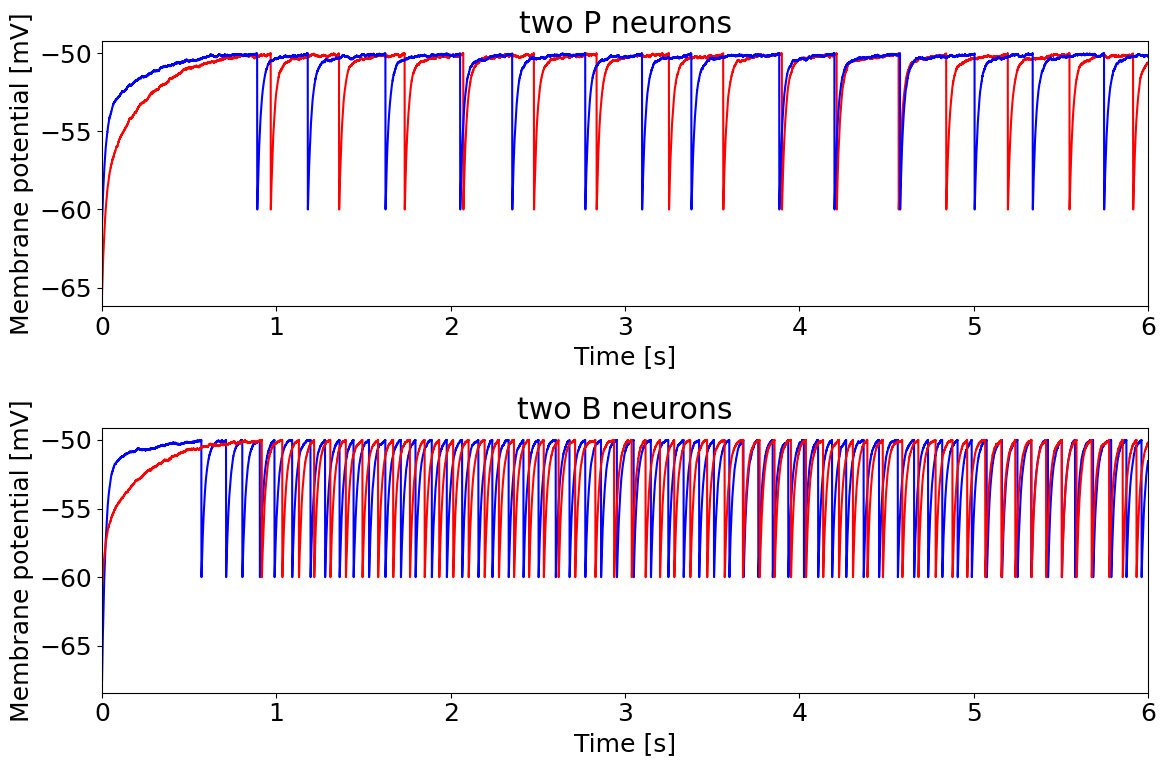

In [1190]:
reload(Mplt)
Mplt.plot_mpt_neuron(built_network,x_axis_limit)

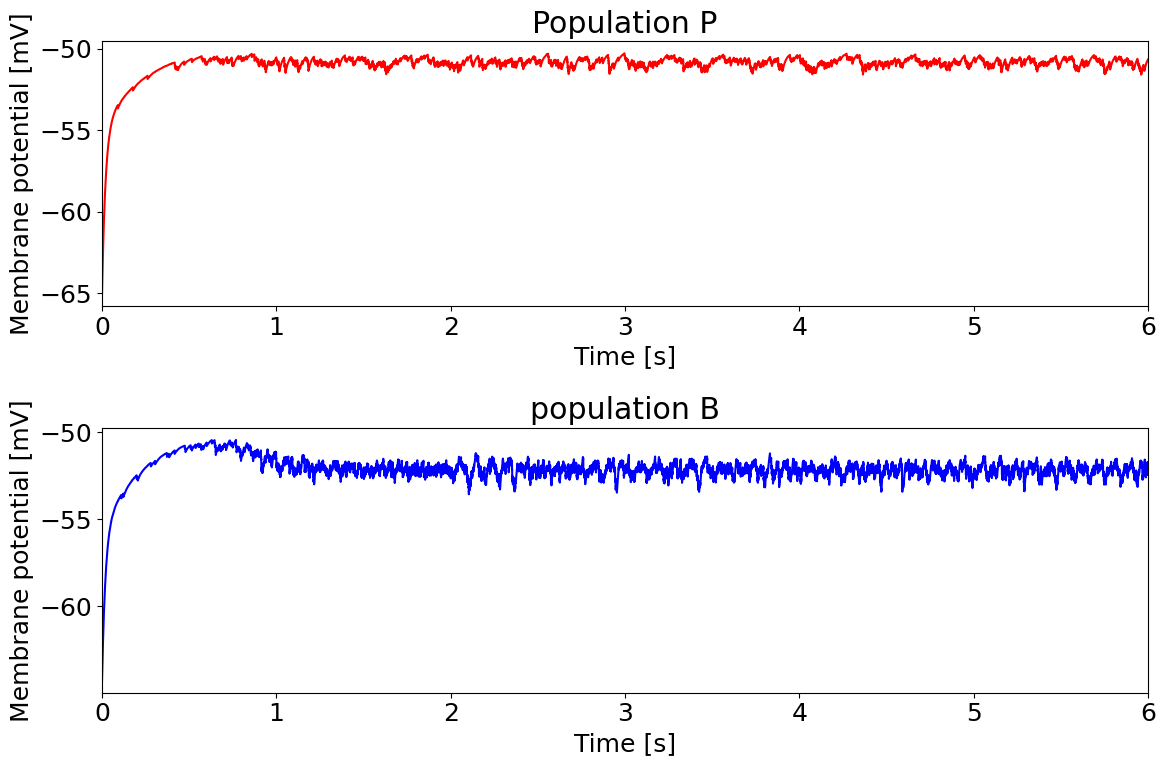

In [1191]:
reload(Mplt)
Mplt.plot_mpt_pop(ready_monitors,x_axis_limit)

## LFP

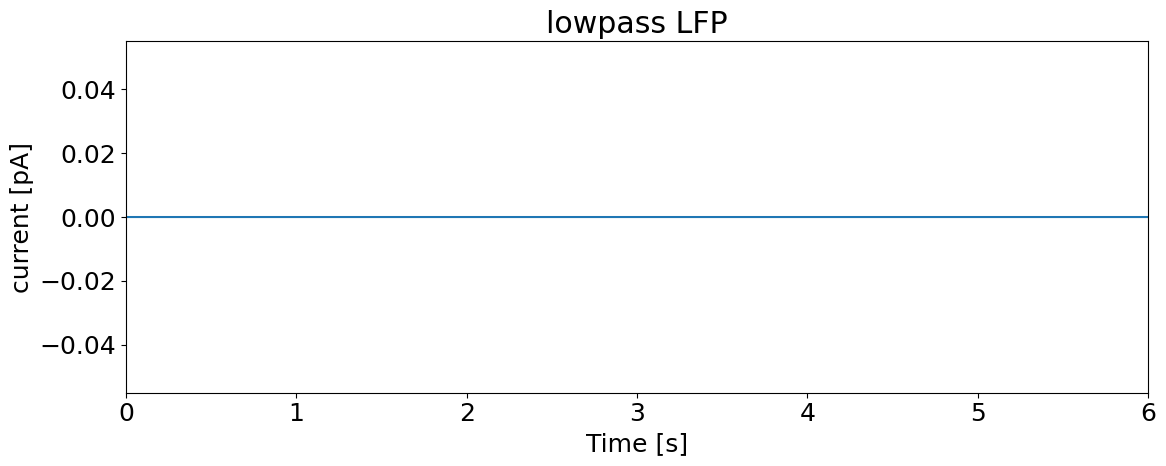

In [1192]:
reload(Mplt)
Mplt.plot_lowpass_LFP(ready_monitors,x_axis_limit)

In [1193]:
print('number of events:',test_data['n_events'])
print('inter event intervals:', test_data['event_intervals'])

number of events: 0


KeyError: 'event_intervals'

In [ ]:
print('Event duration:',"%.1f" % np.mean(test_data['event_durations']),'ms')
print('P firing overall:',"%.2f" % np.mean(test_data['mean_rate_p']),'spikes/s')
print('B firing overall:',"%.2f" % np.mean(test_data['mean_rate_b']),'spikes/s')
print('P firing non-states:',"%.2f" % np.mean(test_data['rtm_p_nswr']),'spikes/s')
print('B firing non-states:',"%.2f" % np.mean(test_data['rtm_b_nswr']),'spikes/s')
print('P firing event:',"%.2f" % np.mean(test_data['rtm_p_event']),'spikes/s')
print('B firing event:',"%.2f" % np.mean(test_data['rtm_b_event']),'spikes/s')
print('Peak time B:',"%.1f" % np.mean(0.1*test_data['rtm_b_event_argmax']),'ms')
print('Peak time P:',"%.1f" % np.mean(0.1*test_data['rtm_p_event_argmax']),'ms')

Event duration: 104.0 ms
P firing overall: 0.00 spikes/s
B firing overall: 2.18 spikes/s
P firing non-states: 0.00 spikes/s
B firing non-states: 2.14 spikes/s
P firing event: 0.00 spikes/s
B firing event: 2.37 spikes/s
Peak time B: 75.4 ms
Peak time P: 48.2 ms
